<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   gvkey        6493 non-null   int64         
 1   conm         6493 non-null   object        
 2   tic          6493 non-null   object        
 3   cusip        6493 non-null   object        
 4   cik          6493 non-null   int64         
 5   sic          6493 non-null   int64         
 6   fyear        6493 non-null   int64         
 7   datadate     6493 non-null   datetime64[ns]
 8   at           6493 non-null   float64       
 9   restatement  6493 non-null   int64         
 10  at_change    5996 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 558.1+ KB
Mean Squared Error: 38387487509.4439
R² Score: 0.215614394543735


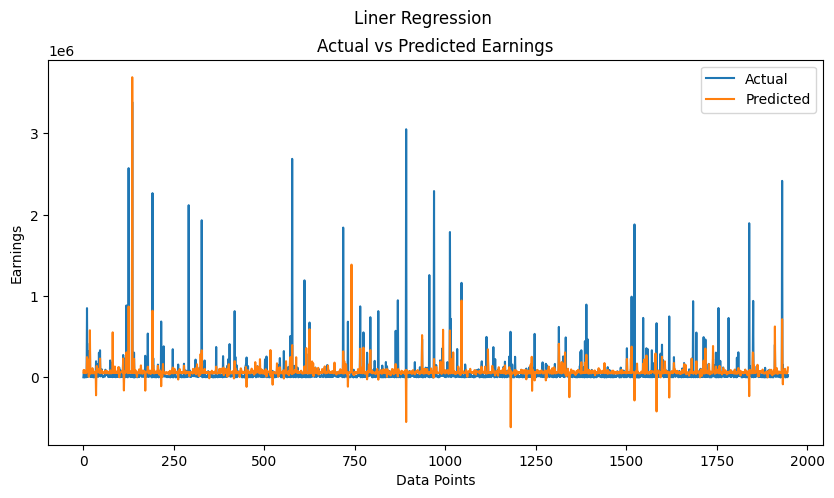

Mean Squared Error: 32624900566.95765
R² Score: 0.33336344615239877
Feature Importances: [0.86812538 0.1235847  0.00828993]


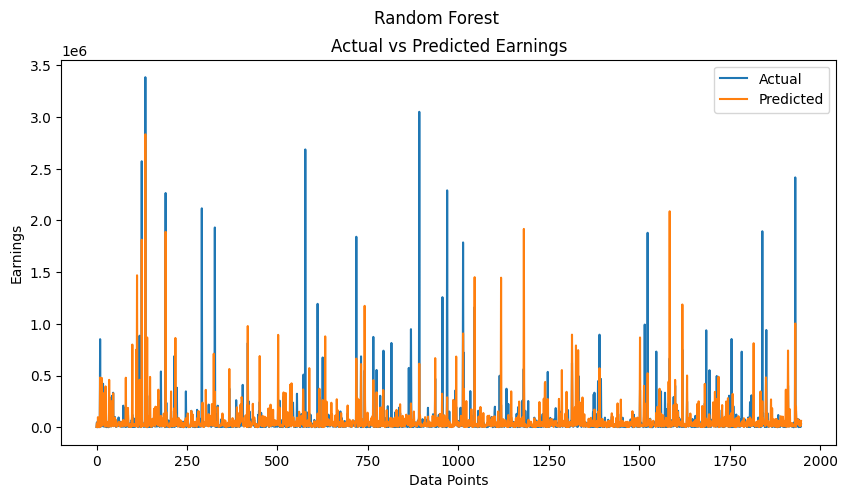

Forecasted Earnings: [287000.97281685]
Gradient Boosting MSE: 28935344047.06127
Gradient Boosting R² Score: 0.4087535071458944
GBM Feature Importances: [0.90177548 0.09472579 0.00349872]


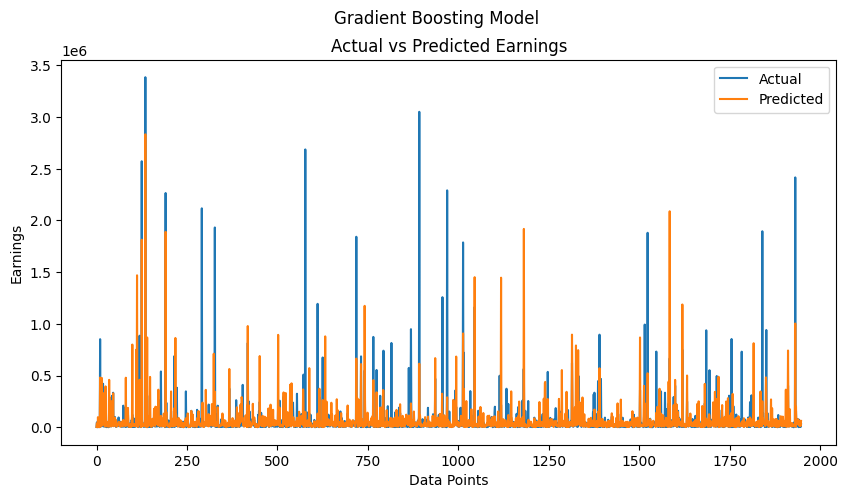

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


#loaddata.
sp500_data = pd.read_csv('SP500_Restatement.csv')

#dataprocessing_cleaning.
#Conversion of Date - integer format to a datetime format for easier manipulation.
sp500_data['datadate'] = pd.to_datetime(sp500_data['datadate'], format='%Y%m%d')

#Calculate year-over-year changes in total assets
#sort the data
sp500_data = sp500_data.sort_values(by=['gvkey', 'datadate'])

# Calculating the difference in 'at' (total assets) from the previous year
sp500_data['at_change'] = sp500_data.groupby('gvkey')['at'].diff()

# Summary statistics- overall trends
summary_statistics = sp500_data.describe()

#duplicate entries
duplicates = sp500_data.duplicated().sum()

# Displaying the changes and summary statistics
summary_statistics, duplicates, sp500_data.head()
sp500_data.head(), sp500_data.info()




#AI_Leaner_regression.

# Prepare the dataset
X = sp500_data[['at_change', 'fyear', 'restatement']].fillna(0)  # Fill NA values
y = sp500_data['at']  # Target variable

# Splitting the dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


#forcasting
# Forecast for a new year (assuming you have the necessary features prepared)
forecast_data = pd.DataFrame({
    'at_change': [42953],  # replace 'value' with your actual data
    'fyear': [2021],      # the forecast year
    'restatement': [0] # 0 or 1
})

import matplotlib.pyplot as plt

# Plotting actual vs predicted values for visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Earnings')
plt.suptitle('Liner Regression')
plt.xlabel('Data Points')
plt.ylabel('Earnings')
plt.legend()
plt.show()


#AI_random_forest.

# Prepare the dataset
X = sp500_data[['at_change', 'fyear', 'restatement']].fillna(0)  # Fill NA values
y = sp500_data['at']  # Target variable

# Splitting the dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Feature Importances
feature_importances = rf_model.feature_importances_
print(f'Feature Importances: {feature_importances}')

#forcasting
# Forecast for a new year (assuming you have the necessary features prepared)
forecast_data = pd.DataFrame({
    'at_change': [42953],  # replace 'value' with your actual data
    'fyear': [2021],      # the forecast year
    'restatement': [0] # 0 or 1
})

import matplotlib.pyplot as plt

# Plotting actual vs predicted values for visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Earnings')
plt.suptitle('Random Forest')
plt.xlabel('Data Points')
plt.ylabel('Earnings')
plt.legend()
plt.show()


predicted_earnings = model.predict(forecast_data)
print(f'Forecasted Earnings: {predicted_earnings}')


#AI_GBM
# Initialize and train the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm_model.predict(X_test)

# Evaluate the model
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')
print(f'Gradient Boosting R² Score: {gbm_r2}')

# Feature Importances
gbm_feature_importances = gbm_model.feature_importances_
print(f'GBM Feature Importances: {gbm_feature_importances}')


#forcasting
# Forecast for a new year (assuming you have the necessary features prepared)
forecast_data = pd.DataFrame({
    'at_change': [42953],  # replace 'value' with your actual data
    'fyear': [2021],      # the forecast year
    'restatement': [0] # 0 or 1
})

import matplotlib.pyplot as plt

# Plotting actual vs predicted values for visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Earnings')
plt.suptitle('Gradient Boosting Model')
plt.xlabel('Data Points')
plt.ylabel('Earnings')
plt.legend()
plt.show()





